In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
import pandas as pd

In [16]:
df=pd.read_csv("ctrain_fb.csv")

In [17]:
# Separate features and target
X = df.drop('label', axis=1)
y = df['label']

In [18]:
import matplotlib.pyplot as plt

In [19]:
label_counts = y.value_counts()

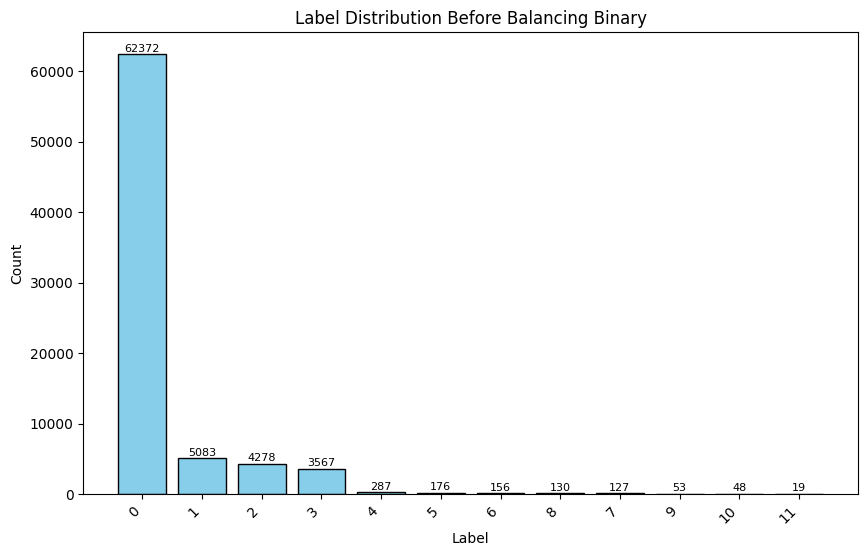

In [20]:
plt.figure(figsize=(10, 6))
bars = plt.bar(label_counts.index.astype(str), label_counts.values, color='skyblue', edgecolor='black')

plt.title("Label Distribution Before Balancing Binary")
plt.xlabel("Label")
plt.ylabel("Count")

# Add value labels on top of bars 
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 100,  
             f'{height}', ha='center', va='bottom', fontsize=8)

# Rotate x labels 
plt.xticks(rotation=45, ha='right')

# Save as PNG
plt.savefig("Label Distribution Before Balancing Binary.png", dpi=800, bbox_inches='tight')

plt.show()

In [21]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [22]:
label_counts = y.value_counts()

In [23]:
print(label_counts)

label
0     62372
2     62372
3     62372
4     62372
1     62372
5     62372
10    62372
7     62372
11    62372
8     62372
6     62372
9     62372
Name: count, dtype: int64


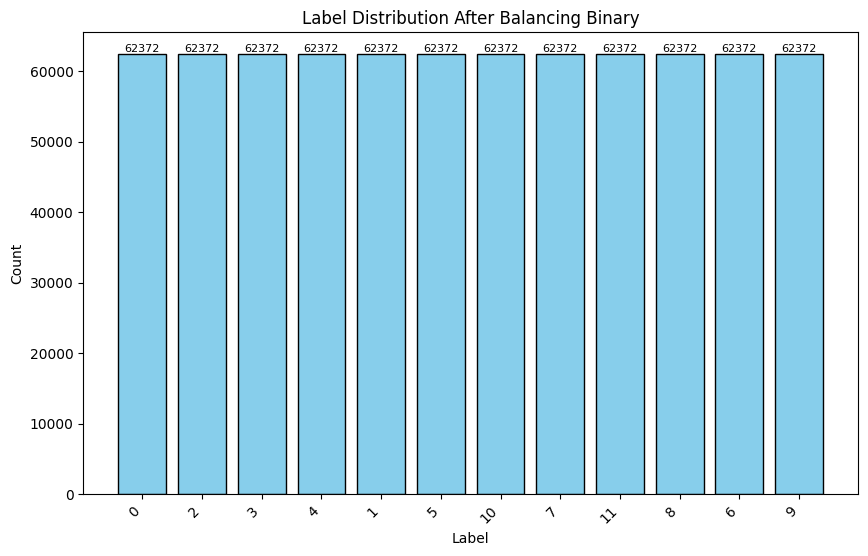

In [24]:
plt.figure(figsize=(10, 6))
bars = plt.bar(label_counts.index.astype(str), label_counts.values, color='skyblue', edgecolor='black')

plt.title("Label Distribution After Balancing Binary")
plt.xlabel("Label")
plt.ylabel("Count")

# Add value labels on top of bars 
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 100,  
             f'{height}', ha='center', va='bottom', fontsize=8)

# Rotate x labels 
plt.xticks(rotation=45, ha='right')

# Save as PNG
plt.savefig("Label Distribution After Balancing Binary.png", dpi=800, bbox_inches='tight')

plt.show()

In [25]:
df_new = X.copy()       # copy X to preserve original
df_new['label'] = y

In [26]:
# Save to CSV
df_new.to_csv("ctrainb.csv", index=False)